**1.** Import the chess game dataset

In [13]:
# IMPORT DATA

import pandas as pd

df = pd.read_csv('dataset_2277.csv')
df.dropna(inplace=True)

print(len(df))
print(df)

1733
      player_name          opp_name  player_elo  opp_elo  elo_diff  color  \
19    BIG_TONKA_T           MedNef0        1453     1427        26   True   
20    BIG_TONKA_T          Huss855c        1444     1442         2  False   
21    BIG_TONKA_T      waleedtahir6        1436     1386        50  False   
22    BIG_TONKA_T           JHH1953        1443     1415        28   True   
23    BIG_TONKA_T             Al045        1434     1532       -98   True   
...           ...               ...         ...      ...       ...    ...   
2272     1lachout          Izgorsek        1412     1410         2   True   
2273     1lachout            Rx1235        1404     1363        41   True   
2274     1lachout             agnks        1395     1358        37  False   
2275     1lachout      sebastienBCN        1386     1292        94  False   
2276     1lachout  Metin_ISTR_Hurin        1392     1412       -20  False   

      x-ma5  x-ma20  opp_x-ma5  opp_x-ma20  won  
19      2.4   -6.65 

**2.** Import the necessary libraries for training

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**3.** Define the predictor and target variables. Then standardize the data

In [130]:
# Assuming your dataframe is named df
X = df[['elo_diff', 'x-ma5', 'x-ma20', 'opp_x-ma5', 'opp_x-ma20', 'color']]
y = df['won']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**4.** A method to visualize accuracy of a model

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy_plot(accuracies):
    best_accuracy = np.max(accuracies[0])
    for i in range(1, len(accuracies)):
        best_accuracy = max(best_accuracy, np.max(accuracies[i]))
    best_epoch = np.argmax(accuracies) + 1
    print('Best accuracy:', best_accuracy, 'at epoch', best_epoch)

    # Plot accuracies against epochs
    plt.rcParams['lines.linewidth'] = 2
    for i in range(len(accuracies)):
        plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], zorder=3)

    # Comparison lines
    plt.rcParams['lines.linewidth'] = 1.25
    plt.axhline(y=0.5, color='r', linestyle='--', label="Coinflip", zorder=2)
    plt.axhline(y=0.52, color='g', linestyle='--', label="Naive", zorder=2)
    plt.axhline(y=best_accuracy, color='b', linestyle='--', label="Best", zorder=2)

    # Labels and settings
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch (each model)')
    plt.ylim(0.40, 0.65)
    plt.legend()
    plt.grid(alpha=0.55)

    num_ticks = 6
    tick_positions = np.linspace(1, len(accuracies[0]), num_ticks, endpoint=True)
    rounded_ticks = np.round(tick_positions)
    plt.xticks(ticks=tick_positions, labels=rounded_ticks)

    plt.show()

    # plot average accuracy
    plt.rcParams['lines.linewidth'] = 2
    plt.plot(range(1, len(accuracies[0]) + 1), np.mean(accuracies, axis=0), zorder=3)

    # best average accuracy
    best_accuracy = np.max(np.mean(accuracies, axis=0))
    best_epoch = np.argmax(np.mean(accuracies, axis=0)) + 1
    print('Best accuracy:', best_accuracy, 'at epoch', best_epoch)

    # Comparison lines
    plt.rcParams['lines.linewidth'] = 1.25
    plt.axhline(y=0.5, color='r', linestyle='--', label="Coinflip", zorder=2)
    plt.axhline(y=0.52, color='g', linestyle='--', label="Naive", zorder=2)
    plt.axhline(y=best_accuracy, color='b', linestyle='--', label="Best", zorder=2)

    # Labels and settings
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch (average)')
    plt.ylim(0.40, 0.65)
    plt.legend()
    plt.grid(alpha=0.55)

    num_ticks = 6
    tick_positions = np.linspace(1, len(accuracies[0]), num_ticks, endpoint=True)
    rounded_ticks = np.round(tick_positions)
    plt.xticks(ticks=tick_positions, labels=rounded_ticks)

    plt.show()


**5.** Train models, plot accuracies

In [67]:
model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 25

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=32, verbose='0')

        loss, accuracy = model.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

11/11 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.5014


Best accuracy: 0.5561959743499756 at epoch 6


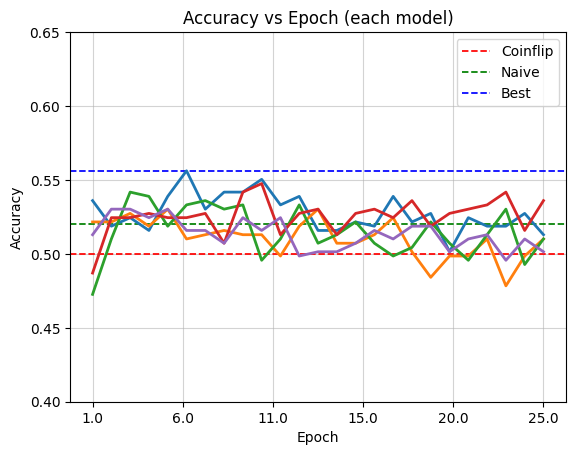

Best accuracy: 0.5308357238769531 at epoch 9


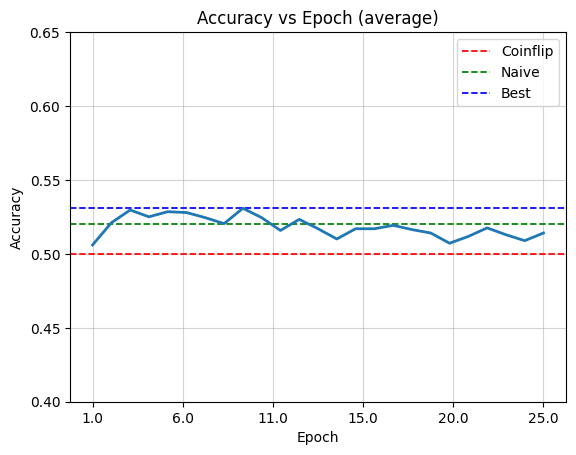

In [68]:
accuracy_plot(model_accuracies)

In [69]:
model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 25

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=64, verbose='0')

        loss, accuracy = model.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

11/11 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.4899


Best accuracy: 0.5561959743499756 at epoch 3


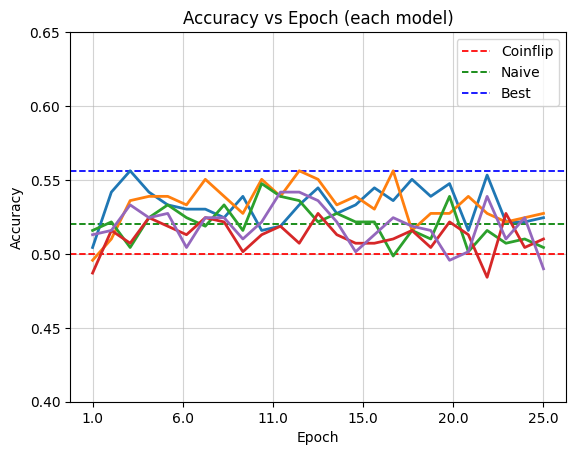

Best accuracy: 0.5360230684280396 at epoch 13


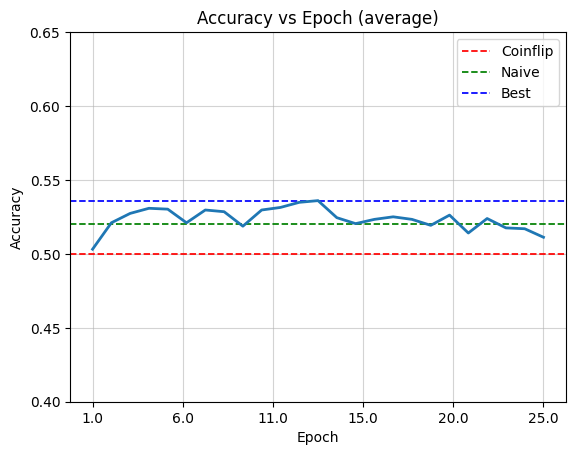

In [70]:
accuracy_plot(model_accuracies)

In [71]:
model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 25

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=128, verbose='0')

        loss, accuracy = model.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

11/11 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5274


Best accuracy: 0.5561959743499756 at epoch 60


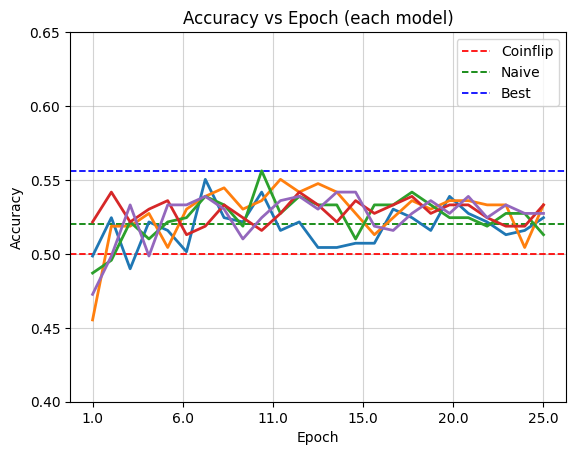

Best accuracy: 0.5371757984161377 at epoch 7


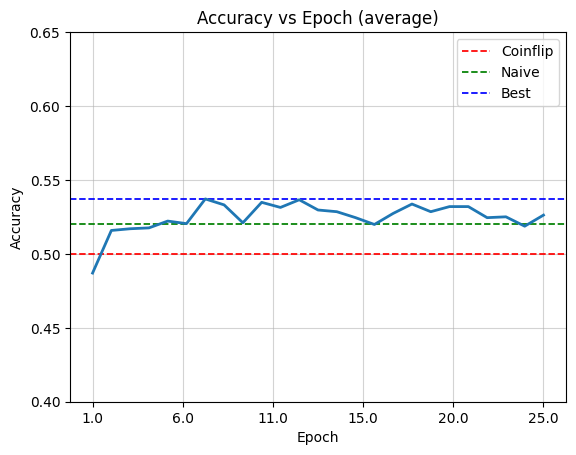

In [72]:
accuracy_plot(model_accuracies)

In [75]:
model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 50

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=128, verbose='0')

        loss, accuracy = model.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

11/11 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5360


Best accuracy: 0.5561959743499756 at epoch 80


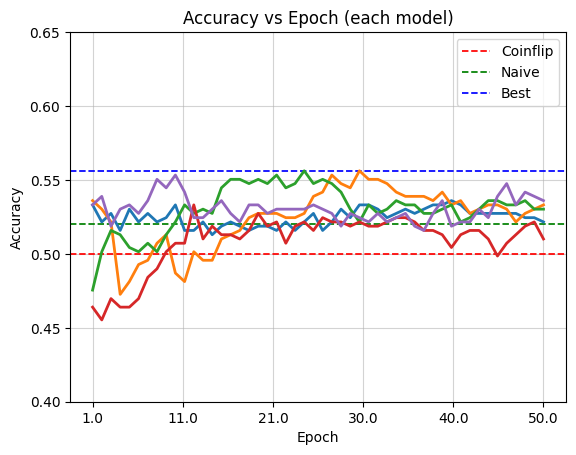

Best accuracy: 0.5342939615249633 at epoch 27


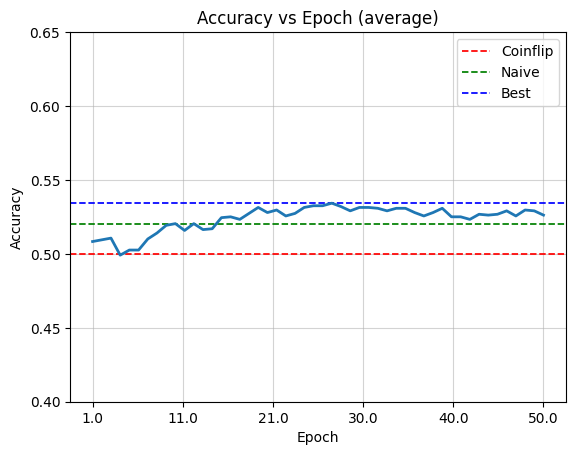

In [76]:
accuracy_plot(model_accuracies)

In [131]:
model_accuracies = []
model_accuracies_train = []

num_epochs = 25

for i in range(5):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=128, verbose='0', validation_data=(X_test, y_test))
    model_accuracies.append(history.history['val_accuracy'])
    model_accuracies_train.append(history.history['accuracy'])


Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25
Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25
Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25
Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoc

Best accuracy: 0.5648415088653564 at epoch 31


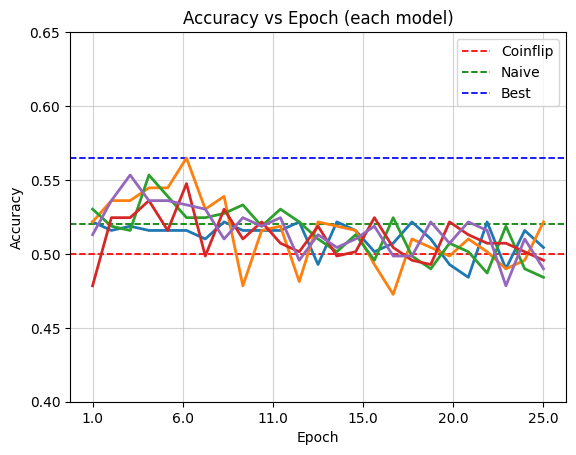

Best accuracy: 0.5371758103370666 at epoch 4


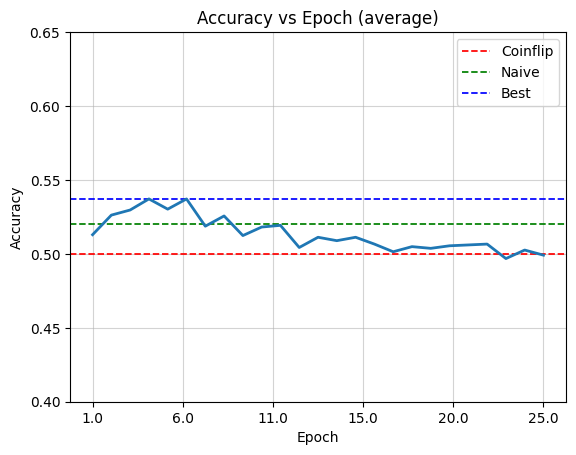

In [132]:
accuracy_plot(model_accuracies)

Best accuracy: 0.6933621764183044 at epoch 125


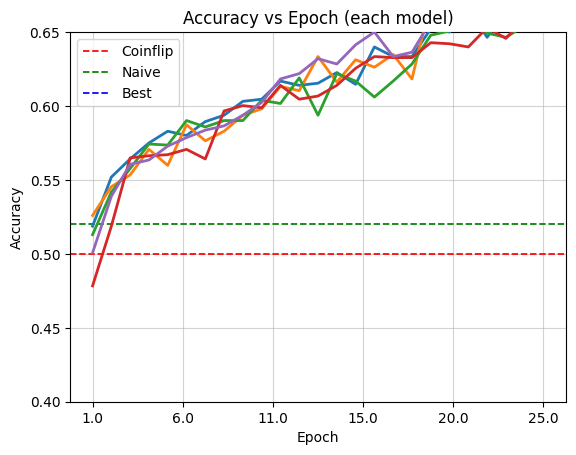

Best accuracy: 0.6838383793830871 at epoch 25


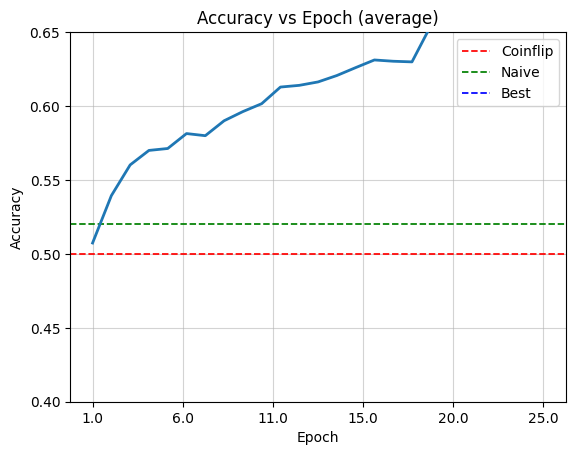

In [133]:
accuracy_plot(model_accuracies_train)

In [94]:
import numpy as np

window_size = 5
feature_columns = ['elo_diff', 'x-ma5', 'x-ma20', 'opp_x-ma5', 'opp_x-ma20', 'color']

X = []
y = []

for player in df['player_name'].unique():
    player_df = df[df['player_name'] == player]

    player_features = player_df[feature_columns].values
    player_target = player_df['won'].values

    for i in range(window_size, len(player_df)):
        X.append(player_features[i-window_size:i])
        y.append(player_target[i])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

num_epochs = 25

model_accuracies = []

for i in range(5):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, len(feature_columns))),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=128, validation_data=(X_test, y_test), verbose=0)
    acc_per_epoch = history.history['val_accuracy']

    model_accuracies.append(acc_per_epoch)

Best accuracy: 0.5572755336761475 at epoch 26


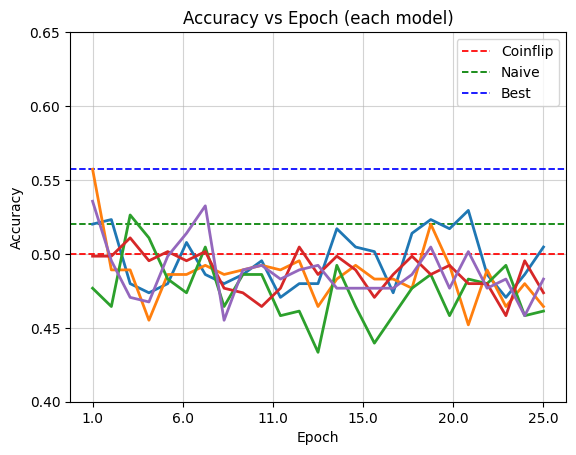

Best accuracy: 0.5176470518112183 at epoch 1


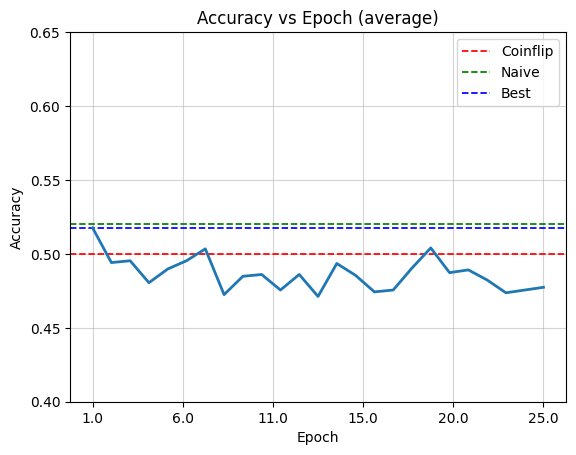

In [102]:
accuracy_plot(model_accuracies)

In [168]:
window_size = 5
time_series_columns = ['x-ma5', 'x-ma20']
current_game_columns = ['opp_x-ma5', 'opp_x-ma20', 'color', 'elo_diff']

X_ts = []  # Time-series data
X_current_game = []  # Current-game data
y = []

for player in df['player_name'].unique():
    player_df = df[df['player_name'] == player]

    player_ts_features = player_df[time_series_columns].values
    player_current_game_features = player_df[current_game_columns].values
    player_target = player_df['won'].values

    for i in range(window_size, len(player_df)):
        X_ts.append(player_ts_features[i-window_size:i])
        X_current_game.append(player_current_game_features[i])
        y.append(player_target[i])

# Convert to numpy arrays
X_ts = np.array(X_ts)
X_current_game = np.array(X_current_game)
y = np.array(y)

X_ts = X_ts.astype('float32')
X_current_game = X_current_game.astype('float32')
y = y.astype('float32')

# Split the datasets
X_train_ts, X_test_ts, X_train_current_game, X_test_current_game, y_train, y_test = train_test_split(
    X_ts, X_current_game, y, test_size=0.2, random_state=42)

# Initialize scalers
scaler_ts = StandardScaler()
scaler_current_game = StandardScaler()

# Scale time-series data
X_train_ts = scaler_ts.fit_transform(X_train_ts.reshape(-1, X_train_ts.shape[-1])).reshape(X_train_ts.shape)
X_test_ts = scaler_ts.transform(X_test_ts.reshape(-1, X_test_ts.shape[-1])).reshape(X_test_ts.shape)

# Scale current-game data
X_train_current_game = scaler_current_game.fit_transform(X_train_current_game)
X_test_current_game = scaler_current_game.transform(X_test_current_game)



In [172]:
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, concatenate
from tensorflow.keras.models import Model

num_epochs = 50

model_accuracies = []
model_accuracies_train = []

for i in range(5):
    # Assuming window_size and num_features are defined as before
    # Define two sets of inputs
    input_ts = Input(shape=(window_size, 2))  # Only for time-series features ('x-ma5', 'x-ma20')
    input_current_game = Input(shape=(4,))   # For current-game features ('opp_x-ma5', 'opp_x-ma20', 'color', 'elo_diff')

    # First branch: Conv1D for time-series
    conv1 = Conv1D(filters=2, kernel_size=3, activation='relu')(input_ts)
    flat1 = Flatten()(conv1)

    # Second branch: Direct input for current-game features
    # (You can add Dense layers here if you want to process these features)
    dense_cg = Dense(16, activation='relu')(input_current_game)

    # Combine the outputs from both branches
    combined = concatenate([flat1, dense_cg])

    # Apply Dense layers to the combined outputs
    dense1 = Dense(16, activation='relu')(combined)
    dense2 = Dense(8, activation='relu')(dense1)

    # Output layer
    output = Dense(1, activation='sigmoid')(dense2)

    # Define the model
    model = Model(inputs=[input_ts, input_current_game], outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Assuming you have prepared X_train_ts, X_train_current_game, X_test_ts, X_test_current_game
    history = model.fit(
        [X_train_ts, X_train_current_game],
        y_train,
        epochs=num_epochs,
        batch_size=128,
        validation_data=([X_test_ts, X_test_current_game], y_test)
    )

    acc_per_epoch = history.history['val_accuracy']
    acc_per_epoch_train = history.history['accuracy']
    model_accuracies.append(acc_per_epoch)
    model_accuracies_train.append(acc_per_epoch_train)

Epoch 1/50
11/11 [==============================] - 2s 26ms/step - loss: 0.7091 - accuracy: 0.4984 - val_loss: 0.6982 - val_accuracy: 0.4799
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.7016 - accuracy: 0.5124 - val_loss: 0.6933 - val_accuracy: 0.4954
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6981 - accuracy: 0.5178 - val_loss: 0.6911 - val_accuracy: 0.5294
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6963 - accuracy: 0.5217 - val_loss: 0.6910 - val_accuracy: 0.5263
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6954 - accuracy: 0.5279 - val_loss: 0.6910 - val_accuracy: 0.5108
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6943 - accuracy: 0.5349 - val_loss: 0.6911 - val_accuracy: 0.5170
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5318 - val_loss: 0.6906 - val_accuracy: 0.5263
Epoch 8/50
11/11 [=

Best accuracy: 0.5572755336761475 at epoch 39


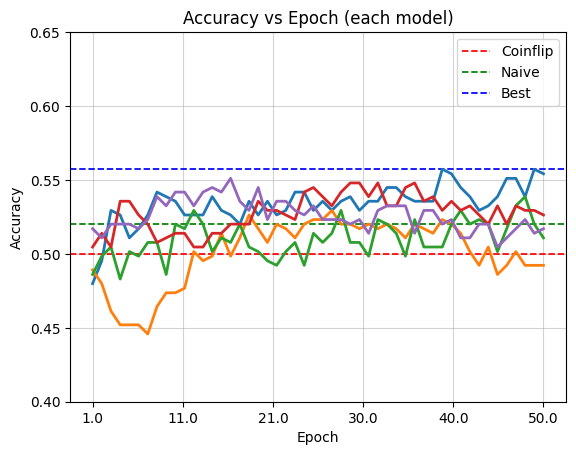

Best accuracy: 0.5306501626968384 at epoch 32


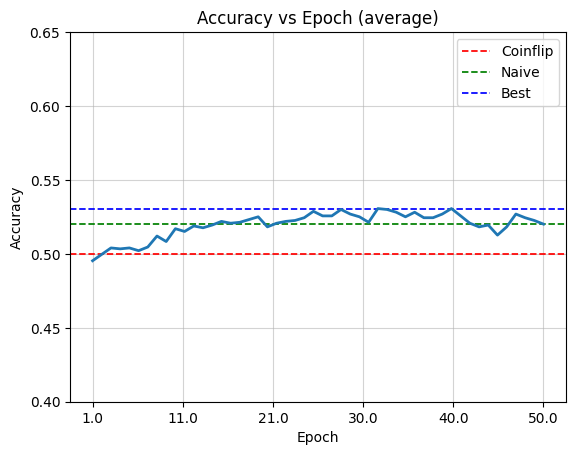

In [174]:
accuracy_plot(model_accuracies)

Best accuracy: 0.6317829489707947 at epoch 200


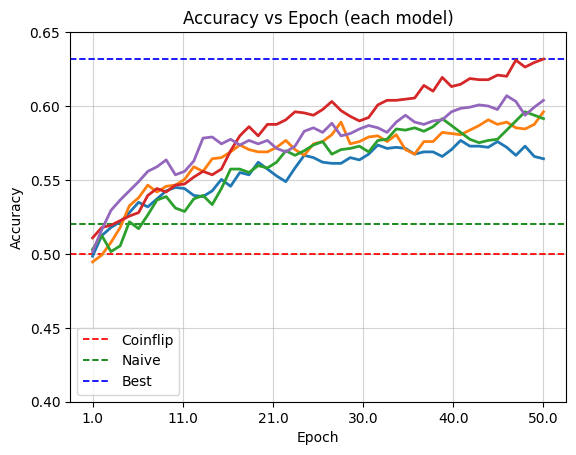

Best accuracy: 0.5975193858146668 at epoch 50


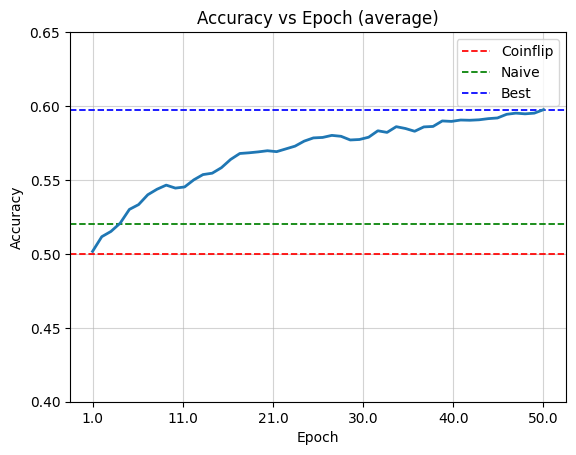

In [175]:
accuracy_plot(model_accuracies_train)